In [1]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [7]:
img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]


In [9]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test.shape

(10000, 28, 28, 1)

In [11]:
input_shape = (img_rows,img_cols, 1)

In [12]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

fro

In [14]:
#one hot 
n_classes  = len(set(y_train))
n_classes

10

In [17]:
y_train = to_categorical(y_train, n_classes)
y_train.shape

(60000, 10, 10)

In [22]:
y_test = to_categorical(y_test, n_classes)
y_test.shape

(10000, 10, 10)

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

opt = Adam()
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [20]:
batch_size = 128
n_epochs = 11
from keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_ac', patience=5)]

In [21]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_split=0.2, callbacks=callbacks)

Epoch 1/11


ValueError: in user code:

    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\91442\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (128, 10, 10) and (128, 10) are incompatible


In [24]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.callbacks import EarlyStopping

(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
n_classes = len(set(y_train))
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

opt = Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
batch_size = 128
n_epochs = 11

# Fix the callback monitor to 'val_acc'
callbacks = [EarlyStopping(monitor='val_acc', patience=5)]

model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_split=0.2, callbacks=callbacks)


Epoch 1/11
375/375 [==============================] - 133s 350ms/step - loss: 0.2096 - accuracy: 0.9361 - val_loss: 0.0575 - val_accuracy: 0.9832
Epoch 2/11
375/375 [==============================] - 126s 336ms/step - loss: 0.0766 - accuracy: 0.9777 - val_loss: 0.0412 - val_accuracy: 0.9881
Epoch 3/11
375/375 [==============================] - 127s 339ms/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.0473 - val_accuracy: 0.9881
Epoch 4/11
375/375 [==============================] - 125s 334ms/step - loss: 0.0443 - accuracy: 0.9864 - val_loss: 0.0450 - val_accuracy: 0.9875
Epoch 5/11
375/375 [==============================] - 125s 333ms/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 0.0365 - val_accuracy: 0.9907
Epoch 6/11
375/375 [==============================] - 124s 332ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0401 - val_accuracy: 0.9890
Epoch 7/11
375/375 [==============================] - 124s 330ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0454 -

In [25]:
score = model.evaluate(X_test,y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])


Test loss 0.028153635561466217
Test accuracy 0.9925000071525574


313/313 [==============================] - 5s 17ms/step


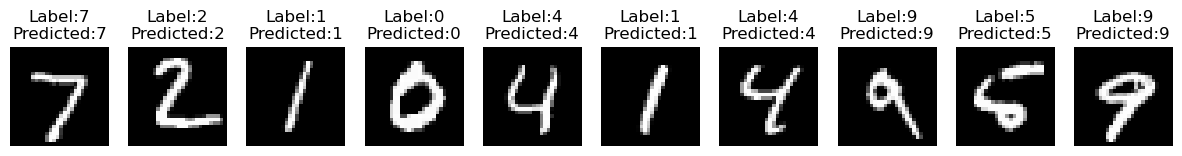

In [29]:
preds = model.predict(X_test)
n_examples = 10
plt.figure(figsize=(15,15))
for i in range(n_examples):
    ax = plt.subplot(2, n_examples, i+1)
    plt.imshow(X_test[i, :, :, 0],cmap='gray')
    plt.title('Label:{}\nPredicted:{}'.format(np.argmax(y_test[i]),np.argmax(preds[i])))
    plt.axis('off')
plt.show()